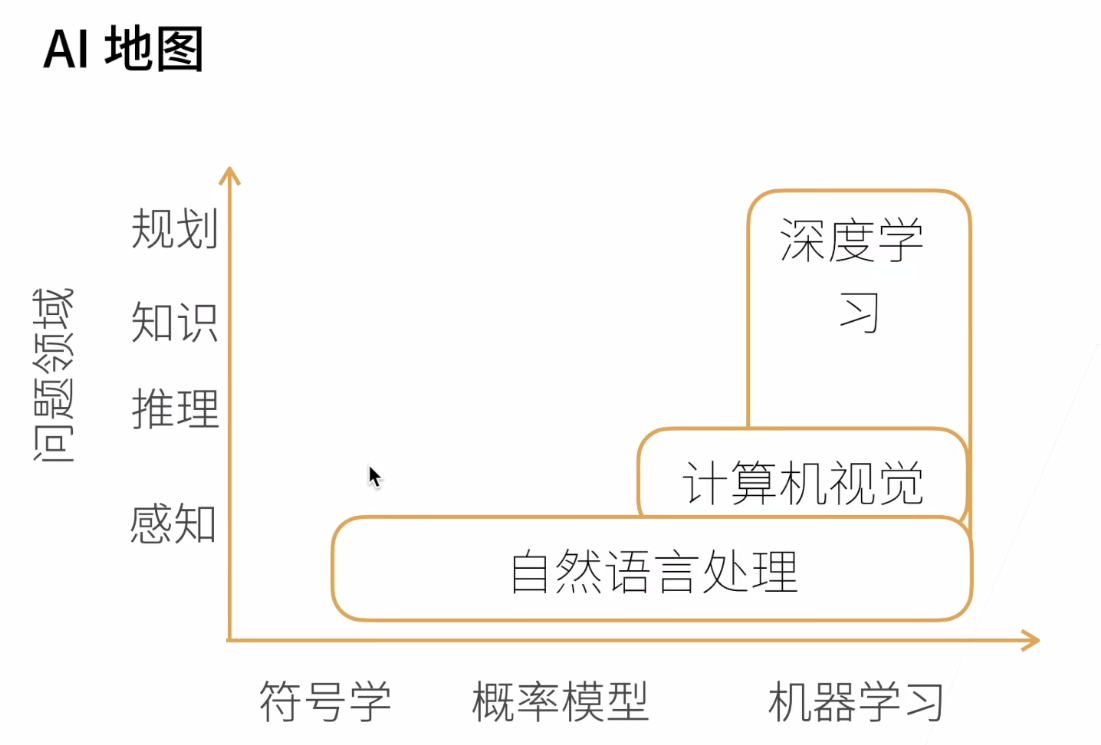
图片分类

物体检测与分割

样式迁移

人脸合成

文字生成图片

文字生成
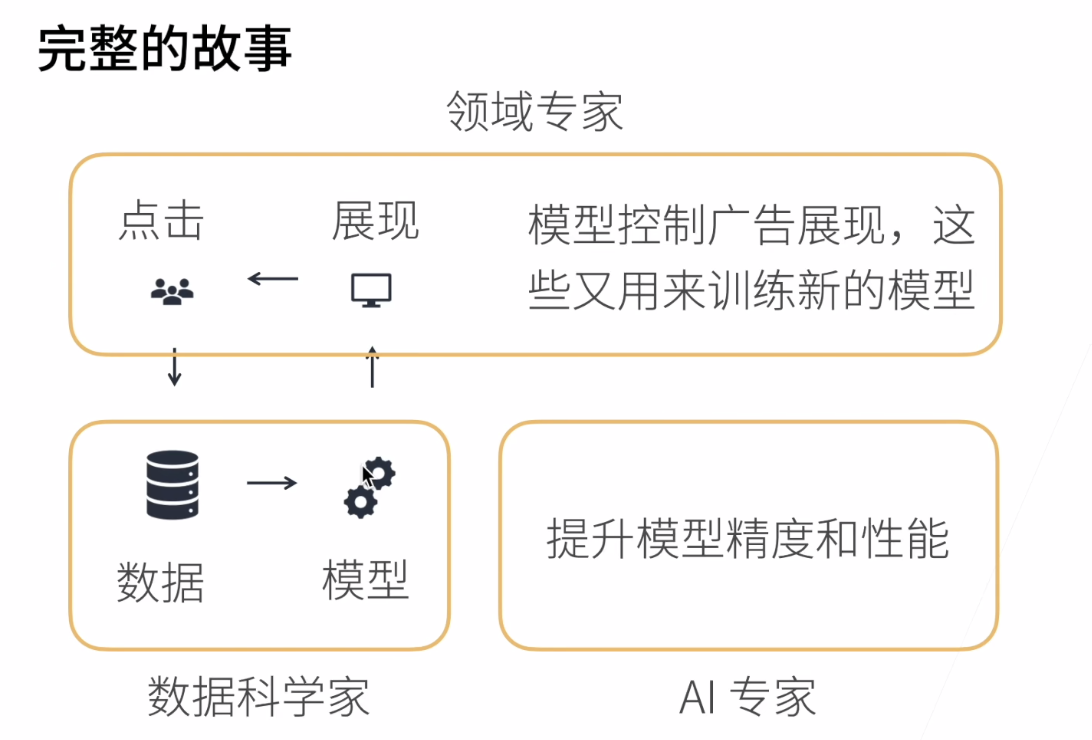

# N维数组


In [3]:
import torch
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [4]:
x.shape

torch.Size([12])

In [5]:
x.numel()

12

In [7]:
x = x.reshape(3, 4)
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [9]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [10]:
torch.tensor(([2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]))

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

常见的标准算数运算符（+，-， * ,/ ,**）

In [11]:
x = torch.arange(12, dtype = torch.float32).reshape(3,4)
y = torch.tensor(([2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]))
torch.cat((x, y), dim=0), torch.cat((x, y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [12]:
x == y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [13]:
x.sum()

tensor(66.)

广播机制

In [14]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [15]:
a+b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

运行一些操作会导致新结构分配内存

In [16]:
before = id(y)
y = y + x
id(y) == before

False

执行原地操作

In [17]:
z = torch.zeros_like(y)
print("id(z):", id(z))
z[:] = x + y
print("id(z):", id(z))

id(z): 1802613507712
id(z): 1802613507712


In [18]:
before = id(x)
x += y
id(x) == before

True

转化为numpy张量

In [19]:
a = x.numpy()
b = torch.tensor(a)
type(a), type(b)

(numpy.ndarray, torch.Tensor)

将大小为1的张量转换为python标量

In [20]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

# 数据预处理
创建一个人工数据集，并存储在csv（逗号分隔值）文件

In [1]:
import os 
os.makedirs(os.path.join("..", "data"), exist_ok=True)
data_file = os.path.join("..", "data", "house_tiny.csv")
with open(data_file, "w") as f:
    f.write("NumRooms,Alley,Price\n") #列名
    f.write("NA,Pave,127500\n") #每行表示一个数据样本
    f.write("2,NA,106000\n")
    f.write("4,NA,178100\n")
    f.write("NA,NA,140000\n")

#如果没有安装pandas只需要取消对以下行的注释
#！pip install pandas
#！pip install pandas
import pandas as pd
data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


为了处理缺失数据，典型的方法包括插值和删除，这里，我们将考虑插值

In [24]:
inputs , outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


对于inputs中的类别值或离散值，我们将“NaN”视为一个类别

In [25]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


In [28]:
import torch
x, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
x, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

# 线性代数
标量由只有一个元素的张量表示

In [29]:
import torch

x = torch.tensor([3.0])
y = torch.tensor([2.0])

x + y, x * y, x / y, x**y

(tensor([5.]), tensor([6.]), tensor([1.5000]), tensor([9.]))

In [31]:
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

矩阵的转置

In [32]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

对称矩阵（symmetric matrix） A等于其转置：A = AT

In [35]:
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [36]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

给定具有相同形状的任何两个张量任何按元素二元运算的结果都将是相同形状的张量

In [38]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

两个矩阵的按元素乘法称为哈达玛积（Hadamard product）

In [39]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [40]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

任意型状张量的元素和


In [43]:
A = torch.arange(40).reshape(2, 5, 4)
A.shape, A.sum()
A

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15],
         [16, 17, 18, 19]],

        [[20, 21, 22, 23],
         [24, 25, 26, 27],
         [28, 29, 30, 31],
         [32, 33, 34, 35],
         [36, 37, 38, 39]]])

指定求和汇总张量的轴

In [42]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(tensor([[20, 22, 24, 26],
         [28, 30, 32, 34],
         [36, 38, 40, 42],
         [44, 46, 48, 50],
         [52, 54, 56, 58]]),
 torch.Size([5, 4]))

In [44]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis0.shape

(tensor([[ 40,  45,  50,  55],
         [140, 145, 150, 155]]),
 torch.Size([5, 4]))

一个与求和相关的量是 平均值（mean或average)

In [49]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[[ 40,  45,  50,  55]],

        [[140, 145, 150, 155]]])

点积是相同位置按元素乘积的和

In [51]:
x = torch.tensor([0.0, 1.0, 2.0, 3.0])
y = torch.ones(4, dtype= torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

矩阵向量积Ax是一个长度为m的列向量


In [54]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
m = torch.tensor([1.0, 2.0, 3.0, 4.0])
torch.mv(A,x)


tensor([ 14.,  38.,  62.,  86., 110.])

In [56]:
B = torch.ones(4, 3)
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

L2范数是向量元素平方和的平方根

In [57]:
u = torch.tensor([3.0, 4.0])
torch.norm(u)

tensor(5.)

L1范数，它表示为向量元素的绝对值之和

In [59]:
torch.abs(u).sum()

tensor(7.)

矩阵的范数是矩阵元素的平方和的平方根

In [60]:
torch.norm(torch.ones(4, 9))

tensor(6.)

## 梯度
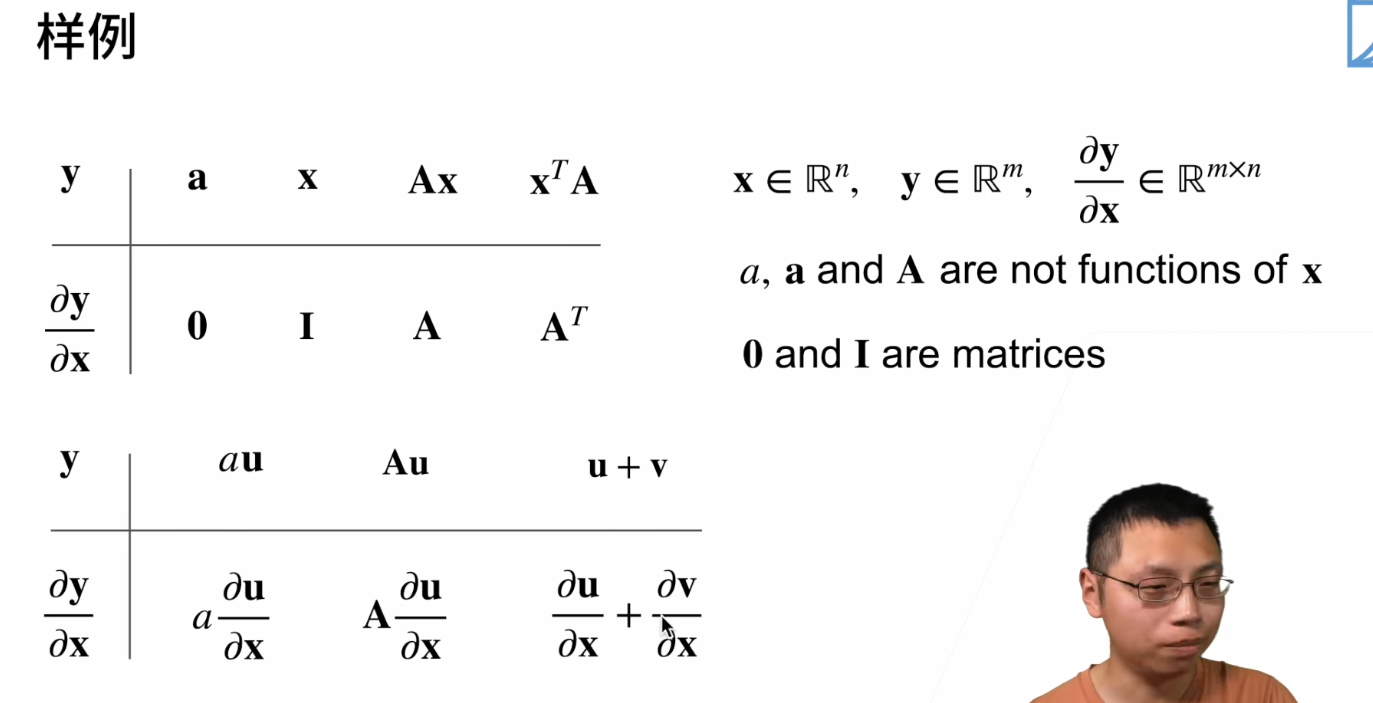
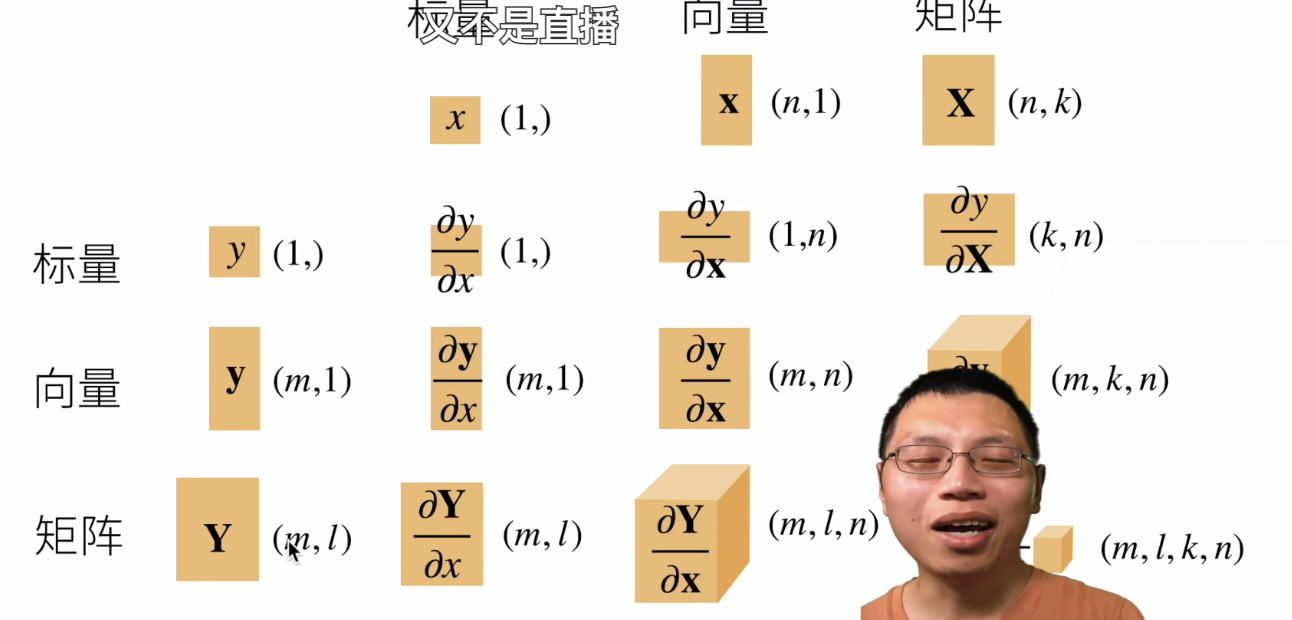

## 自动求导
向量链式法则
- 

In [ ]:
#dropout 随机杀死

目标检测， 分类， 超分辨率重构，医学任务， 识别